## Q2

In [6]:
from sympy import symbols, Matrix

mu1, mu2 = Matrix(['mu1_1', 'mu1_2']), Matrix(['mu2_1', 'mu2_2'])
Sigma1_inv_sym, Sigma2_inv_sym = Matrix([['s11_11', 's11_12'], ['s11_12', 's11_22']]), Matrix([['s22_11', 's22_12'], ['s22_12', 's22_22']])
x_sym = Matrix(['x1', 'x2'])

# combined inverse covariance matrix
Sigma_inv_combined = Sigma1_inv_sym + Sigma2_inv_sym
linear_term_combined = Sigma1_inv_sym*mu1 + Sigma2_inv_sym*mu2

# full quadratic expression
quadratic_expression = -0.5 * (x_sym.T * Sigma_inv_combined * x_sym)[0]
linear_expression = (x_sym.T * linear_term_combined)[0]
constant_expression = -0.5 * (mu1.T * Sigma1_inv_sym * mu1 + mu2.T * Sigma2_inv_sym * mu2)[0]

# full expression
full_expression = quadratic_expression - linear_expression - constant_expression

Sigma_combined = Sigma_inv_combined.inv()
mu_combined = Sigma_combined * linear_term_combined

full_expression, mu_combined, Sigma_combined

(0.5*mu1_1*(mu1_1*s11_11 + mu1_2*s11_12) + 0.5*mu1_2*(mu1_1*s11_12 + mu1_2*s11_22) + 0.5*mu2_1*(mu2_1*s22_11 + mu2_2*s22_12) + 0.5*mu2_2*(mu2_1*s22_12 + mu2_2*s22_22) - 0.5*x1*(x1*(s11_11 + s22_11) + x2*(s11_12 + s22_12)) - x1*(mu1_1*s11_11 + mu1_2*s11_12 + mu2_1*s22_11 + mu2_2*s22_12) - 0.5*x2*(x1*(s11_12 + s22_12) + x2*(s11_22 + s22_22)) - x2*(mu1_1*s11_12 + mu1_2*s11_22 + mu2_1*s22_12 + mu2_2*s22_22),
 Matrix([
 [(-s11_12 - s22_12)*(mu1_1*s11_12 + mu1_2*s11_22 + mu2_1*s22_12 + mu2_2*s22_22)/(s11_11*s11_22 + s11_11*s22_22 - s11_12**2 - 2*s11_12*s22_12 + s11_22*s22_11 + s22_11*s22_22 - s22_12**2) + (s11_22 + s22_22)*(mu1_1*s11_11 + mu1_2*s11_12 + mu2_1*s22_11 + mu2_2*s22_12)/(s11_11*s11_22 + s11_11*s22_22 - s11_12**2 - 2*s11_12*s22_12 + s11_22*s22_11 + s22_11*s22_22 - s22_12**2)],
 [(s11_11 + s22_11)*(mu1_1*s11_12 + mu1_2*s11_22 + mu2_1*s22_12 + mu2_2*s22_22)/(s11_11*s11_22 + s11_11*s22_22 - s11_12**2 - 2*s11_12*s22_12 + s11_22*s22_11 + s22_11*s22_22 - s22_12**2) + (-s11_12 - s22_12)*

## Q4 Confidence Ellipse

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.linalg import sqrtm, inv

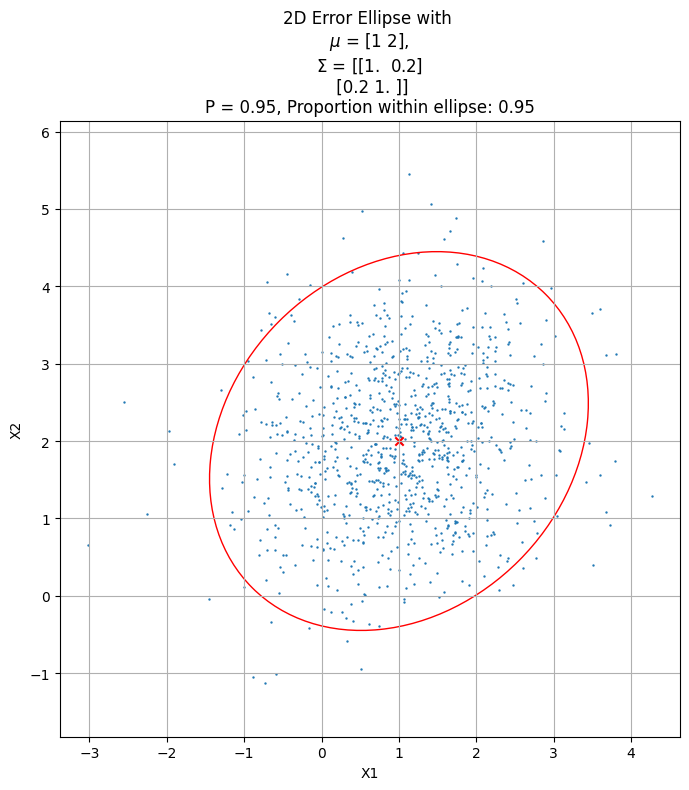

Proportion of points within the error ellipse: 0.95


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from scipy.stats import chi2

def plot_error_ellipse_gaussian(mu, sigma, P, num_samples=1000):
    """
    Plot the error ellipse overlying samples drawn from the Gaussian distribution.

    Parameters:
    mu (array_like): The mean vector of the Gaussian distribution.
    sigma (array_like): The 2x2 covariance matrix of the Gaussian distribution.
    P (float): The desired probability for the ellipse.
    num_samples (int): Number of samples to draw from the distribution.

    Returns:
    float: Proportion of points within the ellipse.
    """
    chi2_score = np.sqrt(chi2.ppf(P, df=2))  # chi2-score based on desired probability P
    
    # Calculate the eigenvalues and eigenvectors of the covariance matrix
    vals, vecs = np.linalg.eigh(sigma)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]  # corresponding pairs
    
    # Calculate the angle and width and height of the ellipse based on eigenvalues
    angle = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    width, height = 2 * chi2_score * np.sqrt(vals)
    
    # Generate samples
    samples = np.random.multivariate_normal(mu, sigma, size=num_samples)
    
    # calculate the proportion of points within the ellipse
    centered_samples = samples - mu
    quadratic_form = np.sum(centered_samples @ np.linalg.inv(sigma) * centered_samples, axis=1)
    within_ellipse = np.sum(quadratic_form <= chi2_score**2) / num_samples
    
    # Plot the samples and the ellipse
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(samples[:, 0], samples[:, 1], s=0.5)
    
    # Create ellipse patch
    ellipse_patch = patches.Ellipse(mu, width, height, angle=angle, edgecolor='r', facecolor='none')
    ax.add_patch(ellipse_patch)
    
    ax.scatter(mu[0], mu[1], color='red', marker='x')  # Mark the mean
    title_str = f'2D Error Ellipse with \n $\mu$ = {mu},  \n$\Sigma$ = {sigma}\n' \
                f'P = {P}, Proportion within ellipse: {within_ellipse:.2f}'
    ax.set_title(title_str)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.axis('equal')
    ax.grid(True)
    plt.show()
    
    return within_ellipse

# plot single one (change mu and sigma)
mu = np.array([1, 2])
sigma = np.array([[1, 0.2], [0.2, 1]])
P = 0.95
within_ellipse = plot_error_ellipse_gaussian(mu, sigma, P)
print(f'Proportion of points within the error ellipse: {within_ellipse:.2f}')
# for multiple
# for mu, sigma in zip(mus, sigmas):
#     within_ellipse = plot_error_ellipse_gaussian(mu, sigma, P)
#     print(f'Proportion of points within the error ellipse: {within_ellipse:.2f}')


## Q5

In [32]:
import numpy as np

# Given matrices
mu_x = np.array([[0], [0]])
Sigma_xx = np.array([[0.7, 0.73], 
                    [0.73, 1.1]])
mu_y = np.array([[0], [0]])
Sigma_yy = np.array([[0.7, 0.19], 
                    [0.19, 0.16]])
Sigma_xy = np.array([[0.63, 0.23], 
                    [0.72, 0.31]])
y = np.array([[0.27], [0.62]])

# inverse sigma_yy
Sigma_yy_inv = np.linalg.inv(Sigma_yy)

# posterior mean mu_x|y
mu_x_given_y = mu_x + Sigma_xy @ Sigma_yy_inv @ (y - mu_y)

# posterior covariance Sigma_x|y
Sigma_x_given_y = Sigma_xx - Sigma_xy @ Sigma_yy_inv @ Sigma_xy.T

mu_x_given_y, Sigma_x_given_y


(array([[0.54048748],
        [0.85540184]]),
 array([[0.10089592, 0.01965744],
        [0.01965744, 0.23836627]]))

### PLOT

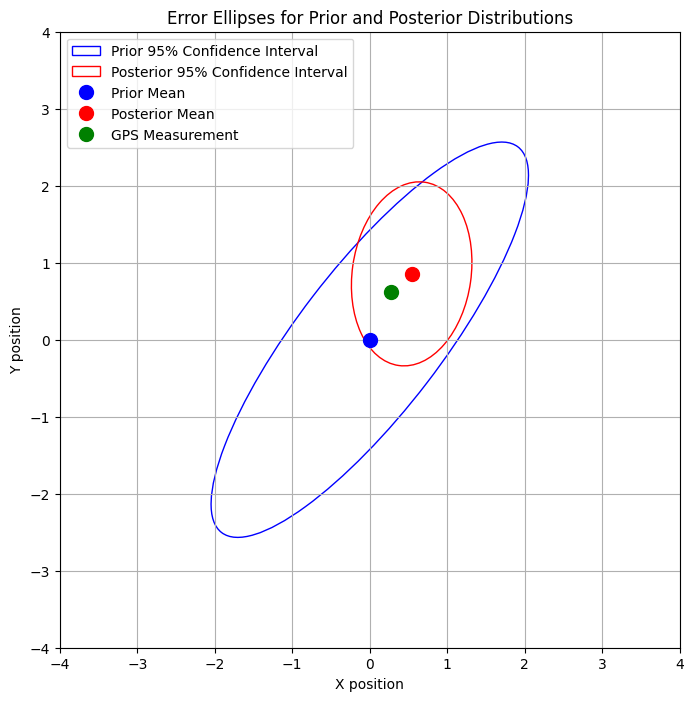

In [18]:
# Function to plot an error ellipse
def plot_error_ellipse(ax, mu, sigma, facecolor='none', **kwargs):

    # eigenvalues and eigenvectors of the covariance matrix
    vals, vecs = np.linalg.eigh(sigma)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:,order]

    # Calculate the angle of the ellipse
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    # Width and height of full ellipse
    width, height = 2 * np.sqrt(5.991 * vals)
    ellipse = Ellipse(xy=mu.flatten(), width=width, height=height, angle=theta, facecolor=facecolor, **kwargs)

    ax.add_patch(ellipse)
    return ellipse

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the error ellipses for the prior and posterior
plot_error_ellipse(ax, mu_x.flatten(), Sigma_xx, edgecolor='blue', label='Prior 95% Confidence Interval')
plot_error_ellipse(ax, mu_x_given_y.flatten(), Sigma_x_given_y, edgecolor='red', label='Posterior 95% Confidence Interval')

# Plot the means and the GPS measurement
ax.plot(mu_x[0], mu_x[1], 'bo', markersize=10, label='Prior Mean')
ax.plot(mu_x_given_y[0], mu_x_given_y[1], 'ro', markersize=10, label='Posterior Mean')
ax.plot(y[0], y[1], 'go', markersize=10, label='GPS Measurement')

# Set graph parameters
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel('X position')
ax.set_ylabel('Y position')
ax.set_title('Error Ellipses for Prior and Posterior Distributions')
ax.legend()
ax.grid(True)

# Display the plot
plt.show()
